In [1]:
#Importamos las bibliotecas a utilizar 
import numpy as np
import matplotlib.pyplot as plt
from math import cos
from scipy.integrate import ode

In [2]:
#Se define la ecuación diferencial a resolver
def f(t, z, p):
    #----------------------------------------------
    # Lado derecho de las ecuaciones diferenciales
    #  dx/dt = y
    #  dy/dt = - δ*y - α*dx - β*x**3 + γ*cos(ω*t)
    #----------------------------------------------
        
    δ, α, β, γ, ω = p                           #Parámetros
    x, y = z                                    #Variables de integración
    f = [y, - δ*y - α*x - β*x**3 + γ*cos(ω*t)]  #Función a integrar
    
    return f

In [3]:
#Se crea una instancia para resolver la ecuación diferencial a través del método 'dopri5'
solver = ode(f)
solver.set_integrator('dopri5')

In [10]:
#Número de puntos para evaluar la ecuación diferencial
N = 100

#Parámetros de la ecuación
gamma = 1.0
alpha = 1.0
beta = 0.01
delta = 0.1
omega = np.linspace(0, 2.5, N)



In [11]:
#Lista para la gráfica de 'ida'
graf1 = []

#Lista para la gráfica de 'vuelta'
graf2 = [] 

w1 = []
w2 = []

In [12]:
#Condiciones iniciales        
t0 = 0.0
#z0 = [ x(0), v(0) ]
z0 = [1.0, 0.0] 
z = 0

for i in range( 0, N ):
     
    ω = omega[i]
    val = delta, alpha, beta, gamma, ω                      
    solver.set_f_params(val)
    
    # Se fija el valor inical z(0) = z0
    solver.set_initial_value(z0, t0)
    
    # Se crea una lista de valores de tiempo para evaluar la ecuación
    # Se crea una lista para los valores obtenidos de la solución
    t1 = 20
    m = 400
    t = np.linspace(t0, t1, m)
    sol = np.empty((m, 2))
    sol[0] = z0
    
    #Se llama repetidamente al integrador para que avance en la solución un tiempo 'k'
    k = 1
    
    while solver.successful() and solver.t < t1:
        solver.integrate(t[k])
        sol[k] = solver.y
        k += 1
        
    x1 = sol[:,0]
    y1 = sol[:,1]
                
    #Actualización de las condiciones iniciales
    t0 = 0.0
    z0 = [max(x1),0]
    w1.append(ω)
    graf1.append(z0[0])
     

    
    
t0 = 0.0
z0 = [1.0,0.0]

for j in range( 0, N ):
    
    if omega[-j] == 0.0 :
        ω = 2.5
        val = delta, alpha, beta, gamma, ω                      
        solver.set_f_params(val)
    else:
        ω = omega[-j]
        val = delta, alpha, beta, gamma, ω                      
        solver.set_f_params(val)
    
    # Para la gráfica de 'vuelta', se toman como condiciones iniciales las últimas de la 'ida'
    solver.set_initial_value(z0, t0)
    
    # Se crea una lista de valores de tiempo para evaluar la ecuación
    # Se crea una lista para los valores obtenidos de la solución
    t1 = 20
    m = 400
    t = np.linspace(t0, t1, m)
    sol = np.empty((m, 2))
    sol[0] = z0
    
    #Se llama repetidamente al integrador para que avance en la solución un tiempo 'k'
    k = 1
    
    while solver.successful() and solver.t < t1:
        solver.integrate(t[k])
        sol[k] = solver.y
        k += 1
        
    x2 = sol[:,0]
    y2 = sol[:,1]
    
    #Actualización de las condiciones iniciales
    t0 = 0.0
    z0 = [max(x2),0]
    w2.append(ω)
    graf2.append(z0[0])

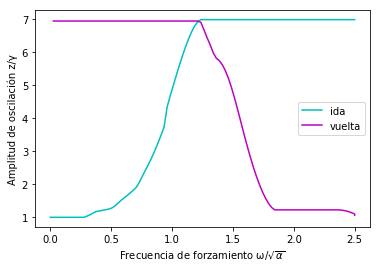

<Figure size 432x288 with 0 Axes>

In [16]:
# Gráfica de la amplitud 
#w1=sort(w1)
plt.plot( w1, graf1, label='ida', color='c' )
plt.plot( w2, graf2, label='vuelta', color='m' )
plt.xlabel('Frecuencia de forzamiento ω/$\sqrt{α}$')
plt.ylabel('Amplitud de oscilación z/γ')
plt.grid(False)
plt.legend()
plt.show()
plt.savefig("duffing.png")
   